In [1]:
%matplotlib inline

import os
import keras
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from os.path import join
from keras.models import Model
from tensorflow import keras
from keras import backend as BD
from keras.regularizers import l2
from scipy.stats import reciprocal
from keras.models import Sequential
from matplotlib.pyplot import imshow
from keras.applications import VGG16
from keras.applications import VGG19
from keras.preprocessing import image
from keras.applications import MobileNetV2
from keras.layers import Conv2D, MaxPooling2D
from keras_applications.resnet_v2 import ResNet50V2
from sklearn.model_selection import RandomizedSearchCV
from keras_applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization

Using TensorFlow backend.


In [2]:
# Data Reading and Cleaning

In [3]:
# Inidcating That it is necessary for any hash based algorithms to produce reproducable values 
os.environ['PYTHONHASHSEED'] = '1'
np.random.seed(42) # Seed for numpy random numbers
random.seed(42) # Seed for python 
tf.random.set_seed(42) # Seed for tensorflow
# We need to force tensorflow to use single thread for getting reproducable results
# Because multiple threads will effect the reproducability (getting the same results everytime)
# Cur_Session = tf.compat.v1.Session(graph = tf.get_default_graph(), config = session_conf)
# BD.set_session(Cur_Session)

In [4]:
# preliminary data Exploration 
hair_colours = ['black', 'blond', 'brown', 'gray']
dataset_directory = 'C:\\Users\\suhas\\Documents\\study\\ML Practice\\image_dataset'  ## CHANGE TO YOUR OWN DIRECTORY

images_train = np.load(join(dataset_directory, 'train_images.npy')) # loading images_train
labels_train = np.load(join(dataset_directory, 'train_labels.npy')) # loading labels_train

images_val = np.load(join(dataset_directory, 'val_images.npy'))
labels_val = np.load(join(dataset_directory, 'val_labels.npy'))
files_val = np.load(join(dataset_directory, 'val_files.npy'))

images_test_public = np.load(join(dataset_directory, 'test_public_images.npy'))
files_test_public = np.load(join(dataset_directory, 'test_public_files.npy'))

In [5]:
image_size = 48
images_train_rs = images_train.reshape([-1, image_size, image_size, 3]) / 255.0 # Normalizing the values
images_val_rs = images_val.reshape([-1, image_size, image_size, 3]) / 255.0 # Normalizing the values
images_test_public_rs = images_test_public.reshape([-1, image_size, image_size, 3]) / 255.0 # normalizing the values
print("Train Data Shape:", images_train_rs.shape)
print("Validation Data Shape:", images_val_rs.shape)
print("Test Data Shape:", images_test_public_rs.shape)

Train Data Shape: (98479, 48, 48, 3)
Validation Data Shape: (12270, 48, 48, 3)
Test Data Shape: (11921, 48, 48, 3)


In [6]:
num_classes = len(hair_colours) # no of classes
labels_train_rs = keras.utils.to_categorical(labels_train, num_classes) # Generating a One hot vector for the Train labels Data
labels_val_rs = keras.utils.to_categorical(labels_val, num_classes) # Generating One Hot vector for the Validation Data
print("Train Labels Shape:", labels_train_rs.shape)
print("Validation Labels Shape:", labels_val_rs.shape)

Train Labels Shape: (98479, 4)
Validation Labels Shape: (12270, 4)


In [7]:
CNN_Final1 = keras.models.Sequential([
   
    keras.layers.Conv2D(32, 3, activation="selu", padding="same", input_shape=[48,48,3]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, 3, activation="selu", padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(64, 3, activation="selu", padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64,3, activation="selu", padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),    
    keras.layers.Dropout(0.25),
      
    keras.layers.Flatten(),
    
    keras.layers.Dense(250, activation = "selu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(num_classes, activation="softmax")    
])


CNN_Final1.summary()

opt = keras.optimizers.Adam(learning_rate=0.0005)

CNN_Final1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        1

In [8]:
CNN_Final_Output = CNN_Final1.fit(images_train_rs, labels_train_rs,
                       batch_size=300,
                       epochs=15,
                       validation_data=(images_val_rs, labels_val_rs))

Epoch 1/15
329/329 [==============================] - 47s 144ms/step - loss: 0.9381 - accuracy: 0.7481 - val_accuracy: 0.8069 - val_loss: 0.6106
Epoch 2/15
329/329 [==============================] - 45s 137ms/step - loss: 0.4587 - accuracy: 0.8448 - val_accuracy: 0.8863 - val_loss: 0.3433
Epoch 3/15
329/329 [==============================] - 48s 147ms/step - loss: 0.3727 - accuracy: 0.8694 - val_accuracy: 0.8780 - val_loss: 0.3625
Epoch 4/15
329/329 [==============================] - 48s 146ms/step - loss: 0.3228 - accuracy: 0.8847 - val_accuracy: 0.8969 - val_loss: 0.2947
Epoch 5/15
329/329 [==============================] - 47s 143ms/step - loss: 0.2910 - accuracy: 0.8941 - val_accuracy: 0.9019 - val_loss: 0.2686
Epoch 6/15
329/329 [==============================] - 46s 140ms/step - loss: 0.2626 - accuracy: 0.9035 - val_accuracy: 0.8951 - val_loss: 0.2997
Epoch 7/15
329/329 [==============================] - 48s 146ms/step - loss: 0.2401 - accuracy: 0.9114 - val_accuracy: 0.9059 - va

In [7]:
# Basic CNN With 6 CNN Layers In total

In [22]:
CNN_Final = keras.models.Sequential([
   
    keras.layers.Conv2D(32, 7, activation="selu", padding="same", input_shape=[48,48,3]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, 7, activation="selu", padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    
    keras.layers.Conv2D(64, 5, activation="selu", padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, 5, activation="selu", padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),    
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    
    keras.layers.Conv2D(128, 3, activation="selu", padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, 3, activation="selu", padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),    
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(250, activation = "selu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation = "selu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(num_classes, activation="softmax")    
])


CNN_Final.summary()

opt = keras.optimizers.Adam(learning_rate=0.0005)

CNN_Final.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 48, 48, 32)        4736      
_________________________________________________________________
batch_normalization_13 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 48, 48, 32)        50208     
_________________________________________________________________
batch_normalization_14 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_50 (Dropout)         (None, 24, 24, 32)       

In [9]:
CNN_Final_Output = CNN_Final.fit(images_train_rs, labels_train_rs,
                       batch_size=300,
                       epochs=10,
                       validation_data=(images_val_rs, labels_val_rs))

NameError: name 'CNN_Final' is not defined

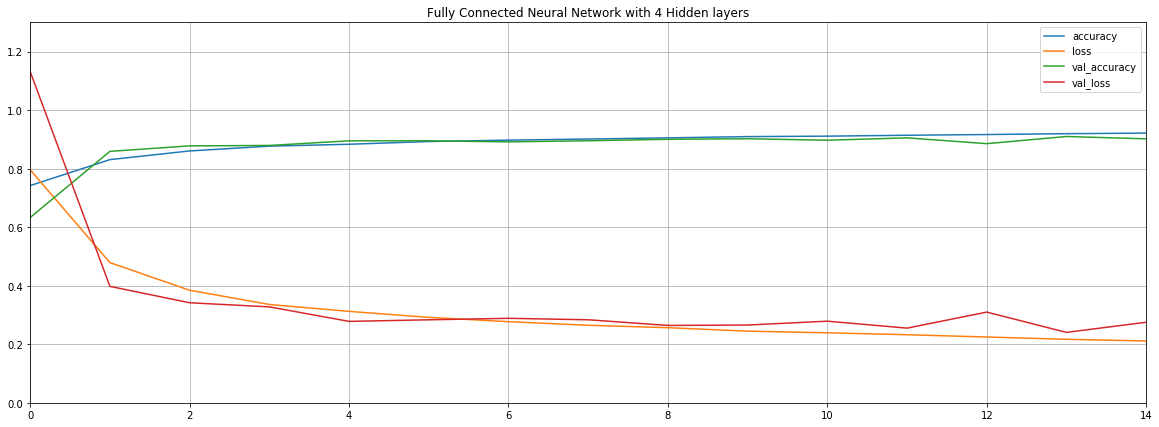

In [25]:
# Plotting the accuray and loss for training and validation data
pd.DataFrame(CNN_Final_Output.history).plot(figsize=(20, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.3)
plt.title("Fully Connected Neural Network with 4 Hidden layers")
plt.show()

In [26]:
CNN_Final_probabilities = CNN_Final.predict([images_test_public_rs])

In [27]:
#### Converting the one hot encoding probability values back to a single column representing wich class does an image belongs to 
Pred_Labels = np.argmax(CNN_Final_probabilities, axis = 1)
print("the first five Predicted classes are:", Pred_Labels)
print("Length of Predicted labels:", len(Pred_Labels))

the first five Predicted classes are: [0 2 0 ... 0 0 2]
Length of Predicted labels: 11921


In [28]:
# creating a data frame for predicted values
df1 = pd.DataFrame(Pred_Labels, columns=['Prediction'])
# creating a data frame for files_val which contains image names
df2 = pd.DataFrame(files_test_public, columns=['ID'])

In [29]:
# Joining the two data frames through the index
CNN_Final2_45693242 = df2.merge(df1, left_index=True, right_index=True)

In [30]:
CNN_Final2_45693242.to_csv (r'C:\\Users\\suhas\\Documents\\study\\ML Practice\\CNN_Final2_45693242.csv', index = False, header=True)

In [31]:
CNN_Final.save("CNN_Final2.h5")

In [ ]:
# Transgfer learning Sequential with VGG19

In [25]:
vgg = VGG19(input_shape=(48,48,3), weights='imagenet', include_top=False)
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [27]:
#Freezing all layers in VGG16 so that the weights wont be changed
for layer in vgg.layers:
    if layer.name == 'block4_conv1':
        break
    layer.trainable = True
    print("The Layer "+layer.name+" is Successfully Frozen")

The Layer input_2 is Successfully Frozen
The Layer block1_conv1 is Successfully Frozen
The Layer block1_conv2 is Successfully Frozen
The Layer block1_pool is Successfully Frozen
The Layer block2_conv1 is Successfully Frozen
The Layer block2_conv2 is Successfully Frozen
The Layer block2_pool is Successfully Frozen
The Layer block3_conv1 is Successfully Frozen
The Layer block3_conv2 is Successfully Frozen
The Layer block3_conv3 is Successfully Frozen
The Layer block3_conv4 is Successfully Frozen
The Layer block3_pool is Successfully Frozen


In [28]:
# We take the output coming from the last layer and feed i to the last newly added layers of our own

vgg_last = vgg.layers[-1].output
new_layer = Flatten()(vgg_last) # Flattening the output layer of vgg
new_layer = Dense(1000, activation = "selu", name = "DenseFullyConnected")(new_layer) # new dense layer adding to the vgg
new_layer = Dropout(0.2) (new_layer) # new Drop out layer
new_layer = Dense(num_classes, activation="softmax", name="Predictions") (new_layer) # new output layer adding to the dense layer
model = Model(vgg.input, new_layer) # building the model




# Compiling the model

model.summary()
#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [29]:
#https://towardsdatascience.com/cnn-transfer-learning-fine-tuning-9f3e7c5806b2
vgg_Output = model.fit(images_train_rs, labels_train_rs,
                       batch_size=300,
                       epochs=15,
                       validation_data=(images_val_rs, labels_val_rs))

Train on 98479 samples, validate on 12270 samples
Epoch 1/15
98479/98479 [==============================] - 167s 2ms/step - loss: 1.0602 - accuracy: 0.5441 - val_loss: 0.5153 - val_accuracy: 0.8160
Epoch 2/15
98479/98479 [==============================] - 167s 2ms/step - loss: 0.4729 - accuracy: 0.8337 - val_loss: 0.3986 - val_accuracy: 0.8623
Epoch 3/15
98479/98479 [==============================] - 167s 2ms/step - loss: 0.3198 - accuracy: 0.8885 - val_loss: 0.4130 - val_accuracy: 0.8507
Epoch 4/15
98479/98479 [==============================] - 167s 2ms/step - loss: 0.2627 - accuracy: 0.9067 - val_loss: 0.2408 - val_accuracy: 0.9131
Epoch 5/15
98479/98479 [==============================] - 167s 2ms/step - loss: 0.2333 - accuracy: 0.9159 - val_loss: 0.2389 - val_accuracy: 0.9145
Epoch 6/15
98479/98479 [==============================] - 168s 2ms/step - loss: 0.2220 - accuracy: 0.9212 - val_loss: 0.2718 - val_accuracy: 0.8958
Epoch 7/15
98479/98479 [==============================] - 168s

KeyboardInterrupt: 

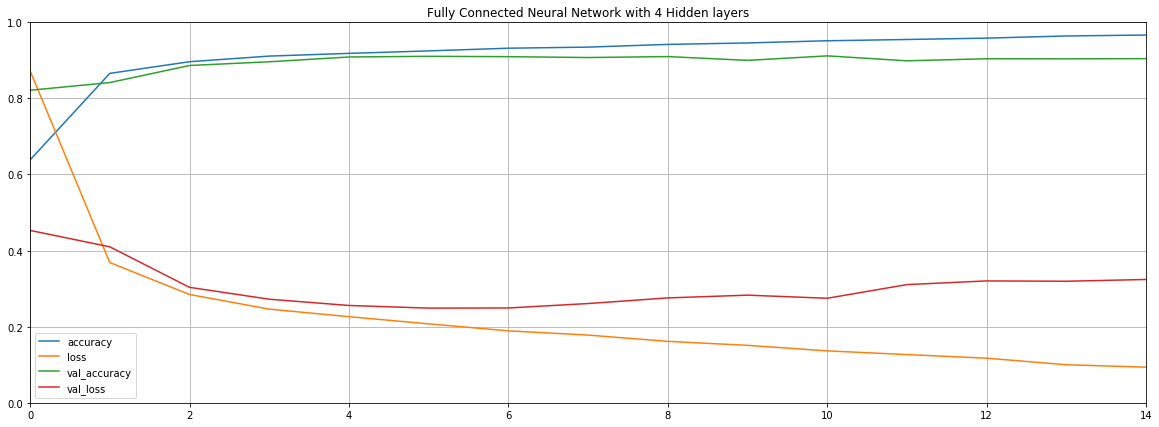

In [17]:
# Plotting the accuray and loss for training and validation data
pd.DataFrame(vgg_Output.history).plot(figsize=(20, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Fully Connected Neural Network with 4 Hidden layers")
plt.show()

In [18]:
VGG_Unfrozen_probabilities = model.predict([images_test_public_rs])

In [19]:
#### Converting the one hot encoding probability values back to a single column representing wich class does an image belongs to 
Pred_Labels = np.argmax(VGG_Unfrozen_probabilities, axis = 1)
print("the first five Predicted classes are:", Pred_Labels)
print("Length of Predicted labels:", len(Pred_Labels))

the first five Predicted classes are: [0 2 0 ... 0 0 1]
Length of Predicted labels: 11921


In [20]:
# creating a data frame for predicted values
df1 = pd.DataFrame(Pred_Labels, columns=['Prediction'])
# creating a data frame for files_val which contains image names
df2 = pd.DataFrame(files_test_public, columns=['ID'])

In [21]:
# Joining the two data frames through the index
VGG_Unfrozen_45693242 = df2.merge(df1, left_index=True, right_index=True)

In [22]:
VGG_Unfrozen_45693242.to_csv (r'C:\\Users\\suhas\\Documents\\study\\ML Practice\\VGG_Unfrozen_45693242.csv', index = False, header=True)

In [24]:
model.save("VGG_Unfrozen_45693242.h5")